## Features Extraction from 2D image using Haar Wavelet Transform

In [173]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data
import cv2
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from pyppca import ppca
%matplotlib inline

In [174]:
# Read an image from the dataset as grayscale image
image = cv2.imread("MangoLeavesDatabase/Alphonso/front/alphonso_front_00.jpg", cv2.IMREAD_GRAYSCALE)

### Applying first level decomposition using Haar Wavelet Transform on input image

In [175]:
LL1, (LH1, HL1, HH1) = pywt.dwt2(image, 'haar')
#LL1 = normalize(LL1) * 255
#HL1 = normalize(HL1)

### LL1 is the approximation coefficient and contains maximum information of the image after decomposition and hence we use it for 2nd level decomposition

In [176]:
LL2, (LH2, HL2, HH2) = pywt.dwt2(LL1, 'haar')
#LL2 = normalize(LL2) * 255
#HL2 = normalize(HL2)

### LL2 is the approximation cofficient and contains maximum information of LL1 and hence we use it for 3rd level decomposition

In [177]:
LL3, (LH3, HL3, HH3) = pywt.dwt2(LL2, 'haar')
#LL3 = normalize(LL3) * 255
#HL3 = normalize(HL3)

### We repeat this decomposition process upto two more levels to get LL4 and LL5

In [178]:
LL4, (LH4, HL4, HH4) = pywt.dwt2(LL3, 'haar')
#LL4 = normalize(LL4) * 255
#HL4 = normalize(HL4)
LL5, (LH5, HL5, HH5) = pywt.dwt2(LL4, 'haar')
#LL5 = normalize(LL5) * 255
#HL5 = normalize(HL5)

## Computation of Histograms of LL1, HL1, LL2, HL2, LL3, HL3, LL4, HL4, LL5 and HL5

In [179]:
LL1_hist, _ = np.histogram(np.ravel(LL1), 256, (0, 255))
HL1_hist, _ = np.histogram(np.ravel(HL1), 256, (0, 255))
LL2_hist, _ = np.histogram(np.ravel(LL2), 256, (0, 255))
HL2_hist, _ = np.histogram(np.ravel(HL2), 256, (0, 255))
LL3_hist, _ = np.histogram(np.ravel(LL3), 256, (0, 255))
HL3_hist, _ = np.histogram(np.ravel(HL3), 256, (0, 255))
LL4_hist, _ = np.histogram(np.ravel(LL4), 256, (0, 255))
HL4_hist, _ = np.histogram(np.ravel(HL4), 256, (0, 255))
LL5_hist, _ = np.histogram(np.ravel(LL5), 256, (0, 255))
HL5_hist, _ = np.histogram(np.ravel(HL5), 256, (0, 255))

### Plotting all histograms using matplotlib

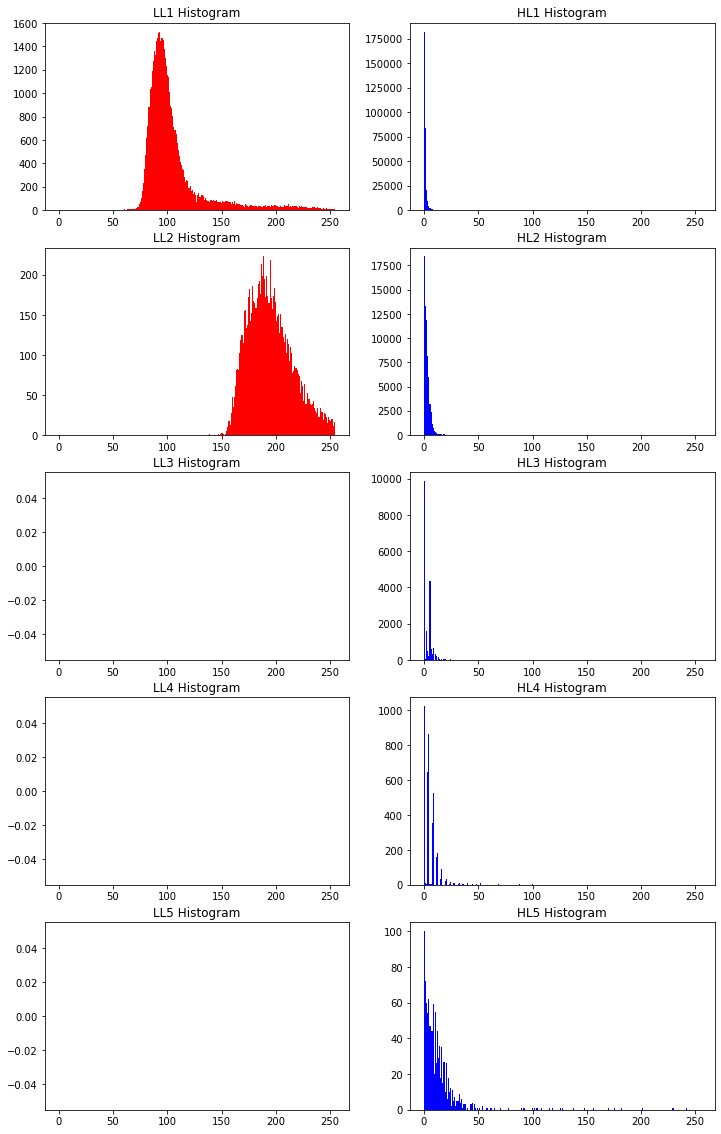

In [180]:
decompositions = [
    [LL1, HL1],
    [LL2, HL2],
    [LL3, HL3],
    [LL4, HL4],
    [LL5, HL5],
]
titles = [
    ['LL1 ', 'HL1 '],
    ['LL2 ', 'HL2 '],
    ['LL3 ', 'HL3 '],
    ['LL4 ', 'HL4 '],
    ['LL5 ', 'HL5 '],
]
colors = ['red', 'blue']
fig, axes = plt.subplots(5, 2)
fig.set_size_inches(12, 20)
for i in range(5):
    for j in range(2):
        flatten = np.ravel(decompositions[i][j])
        axes[i, j].set_title(titles[i][j] + "Histogram")
        axes[i, j].hist(flatten, bins=256, range=[0, 255],color=colors[j])
plt.show()

### Displaying all decomposed images

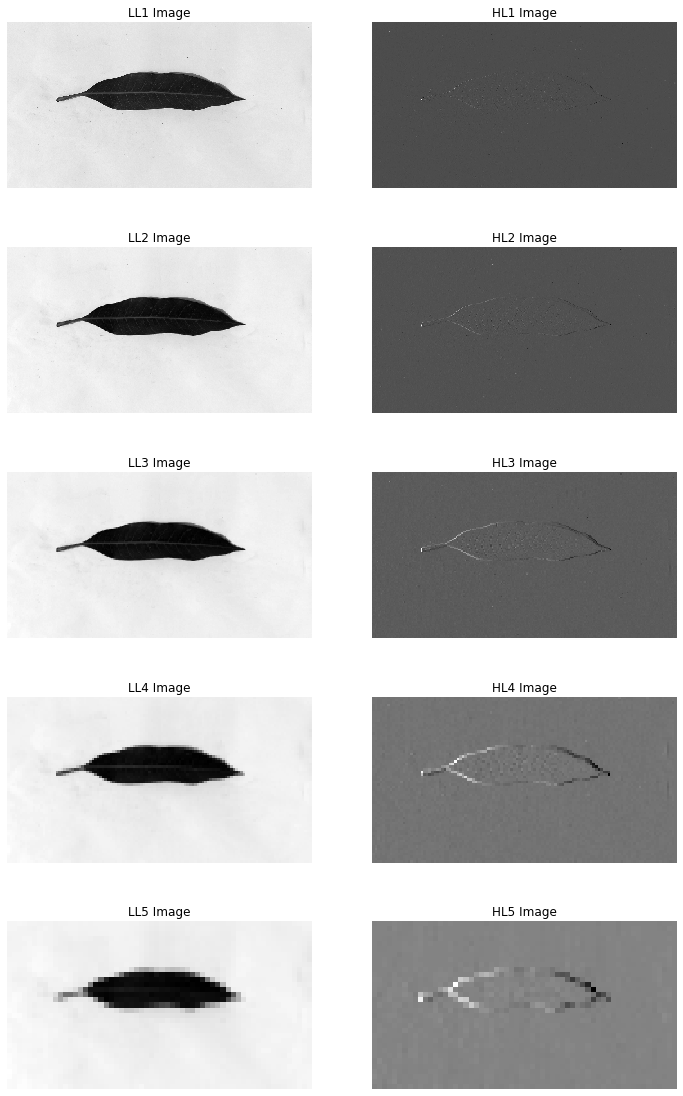

In [181]:
fig, axes = plt.subplots(5, 2)
fig.set_size_inches(12, 20)
for i in range(5):
    for j in range(2):
        axes[i, j].set_title(titles[i][j] + "Image")
        axes[i, j].set_axis_off()
        axes[i, j].imshow(decompositions[i][j], cmap="gray")
plt.show()

## Concatenation of all histograms into 256 x 10 matrix

In [194]:
concat_hist = np.stack(
    (LL1_hist, HL1_hist, 
     LL2_hist, HL2_hist,
     LL3_hist, HL3_hist,
     LL4_hist, HL4_hist,
     LL5_hist, HL5_hist), axis=0)
print(concat_hist.shape)
print("Minimum Value : {0}\t Maximum Value : {1}".format(np.min(concat_hist), np.max(concat_hist)))

(10, 256)
Minimum Value : 0	 Maximum Value : 182233


## Applying Probablistic Principal Component Analysis (PPCA) for dimensionality reduction of 256 x 10 features matrix

In [195]:
pca = PCA(n_components=1)
result = pca.fit_transform(normalize(concat_hist))
print(result.shape)
print(np.ravel(result))
print("Minimum Value : {0}\t Maximum Value : {1}".format(np.min(result), np.max(result)))

(10, 1)
[ 0.63634125 -0.48512113  0.6377888  -0.50983439  0.33528669 -0.45683671
  0.33528669 -0.40199418  0.33528669 -0.4262037 ]
Minimum Value : -0.5098343914088522	 Maximum Value : 0.637788798068208


In [184]:
print("Min LL1 : {0}\tMax LL1 : {1}".format(np.min(LL1), np.max(LL1)))
print("Min LL2 : {0}\tMax LL2 : {1}".format(np.min(LL2), np.max(LL2)))
print("Min LL3 : {0}\tMax LL3 : {1}".format(np.min(LL3), np.max(LL3)))
print("Min LL4 : {0}\tMax LL4 : {1}".format(np.min(LL4), np.max(LL4)))
print("Min LL5 : {0}\tMax LL5 : {1}".format(np.min(LL5), np.max(LL5)))

Min LL1 : 41.00000000000001	Max LL1 : 476.0
Min LL2 : 139.00000000000006	Max LL2 : 914.7500000000003
Min LL3 : 312.2500000000001	Max LL3 : 1816.5000000000007
Min LL4 : 651.6875000000005	Max LL4 : 3624.000000000002
Min LL5 : 1345.843750000001	Max LL5 : 7194.0000000000055


In [185]:
print("Min HL1 : {0}\tMax HL1 : {1}".format(np.min(HL1), np.max(HL1)))
print("Min HL2 : {0}\tMax HL2 : {1}".format(np.min(HL2), np.max(HL2)))
print("Min HL3 : {0}\tMax HL3 : {1}".format(np.min(HL3), np.max(HL3)))
print("Min HL4 : {0}\tMax HL4 : {1}".format(np.min(HL4), np.max(HL4)))
print("Min HL5 : {0}\tMax HL5 : {1}".format(np.min(HL5), np.max(HL5)))

Min HL1 : -92.00000000000003	Max HL1 : 215.50000000000003
Min HL2 : -163.25000000000003	Max HL2 : 350.0000000000001
Min HL3 : -234.25000000000023	Max HL3 : 419.1250000000001
Min HL4 : -436.25000000000045	Max HL4 : 532.3125000000003
Min HL5 : -1060.4062500000002	Max HL5 : 1000.1562500000007
